In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')


In [3]:
#Importing the dataset
data_or=pd.read_csv("HR Employee Attrition.csv")
data_or.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#To check for null values
data_or.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no any null values in all the variables and hence the data is complete.

In [5]:
data_or.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [6]:
#To check the data content
data_or.shape

(1470, 35)

There are in all 1470 responses and 34 variables.

In [7]:
#To check the information of data
data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The output represents the data type of each variable , total count and wheteher any null value is present.In all there are 34 variables , 9 of them are having string datatype and remaining 25 variables are integers of which some are categorical variables represented in integer format.

In [8]:
#To check the value counts for target variable
data_or.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Of the total 1470 responses 1233 employees retain their job and remaining 237 resign off the job.

In [9]:
#To save the copy of data in new varaible
data=data_or.copy()

In [10]:
#To display the features that are actually the categorical variables but displayed as the object.
data.Attrition=pd.Categorical(data.Attrition)
data.BusinessTravel=pd.Categorical(data.BusinessTravel)
data.Department=pd.Categorical(data.Department)
data.Gender=pd.Categorical(data.Gender)
data.OverTime=pd.Categorical(data.OverTime)
data.JobRole=pd.Categorical(data.JobRole)
data.Over18=pd.Categorical(data.Over18)
data.MaritalStatus=pd.Categorical(data.MaritalStatus)
data.EducationField=pd.Categorical(data.EducationField)

In [11]:
#To display the features that are actually the categorical variables but displayed as the integers.
data.Education[data.Education==1]="Below College"
data.Education[data.Education==2]="College"
data.Education[data.Education==3]="Bachelor"
data.Education[data.Education==4]="Master"
data.Education[data.Education==5]="Doctor"

data.Education=pd.Categorical(data.Education)

data.EnvironmentSatisfaction[data.EnvironmentSatisfaction==1]="Low"
data.EnvironmentSatisfaction[data.EnvironmentSatisfaction==2]="Medium"
data.EnvironmentSatisfaction[data.EnvironmentSatisfaction==3]="High"
data.EnvironmentSatisfaction[data.EnvironmentSatisfaction==4]="Very High"

data.EnvironmentSatisfaction=pd.Categorical(data.EnvironmentSatisfaction)

data.JobInvolvement[data.JobInvolvement==1]="Low"
data.JobInvolvement[data.JobInvolvement==2]="Medium"
data.JobInvolvement[data.JobInvolvement==3]="High"
data.JobInvolvement[data.JobInvolvement==4]="Very High"

data.JobInvolvement=pd.Categorical(data.JobInvolvement)

data.JobSatisfaction[data.JobSatisfaction==1]="Low"
data.JobSatisfaction[data.JobSatisfaction==2]="Medium"
data.JobSatisfaction[data.JobSatisfaction==3]="High"
data.JobSatisfaction[data.JobSatisfaction==4]="Very High"

data.JobSatisfaction=pd.Categorical(data.JobSatisfaction)

data.PerformanceRating[data.PerformanceRating==1]="Low"
data.PerformanceRating[data.PerformanceRating==2]="Good"
data.PerformanceRating[data.PerformanceRating==3]="Excellent"
data.PerformanceRating[data.PerformanceRating==4]="Outstanding"

data.PerformanceRating=pd.Categorical(data.PerformanceRating)

data.RelationshipSatisfaction[data.RelationshipSatisfaction==1]="Low"
data.RelationshipSatisfaction[data.RelationshipSatisfaction==2]="Medium"
data.RelationshipSatisfaction[data.RelationshipSatisfaction==3]="High"
data.RelationshipSatisfaction[data.RelationshipSatisfaction==4]="Very High"

data.RelationshipSatisfaction=pd.Categorical(data.RelationshipSatisfaction)

data.WorkLifeBalance[data.WorkLifeBalance==1]="Bad"
data.WorkLifeBalance[data.WorkLifeBalance==2]="Good"
data.WorkLifeBalance[data.WorkLifeBalance==3]="Better"
data.WorkLifeBalance[data.WorkLifeBalance==4]="Best"

data.WorkLifeBalance=pd.Categorical(data.WorkLifeBalance)

In [12]:
#Now to check the changes in variable type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

Now, the variables of categorical type are 16 and remaining 18 are integer type.

In [13]:
#Data Reduction
#To remove the columns that do not affect the dependent variable Attrition as they are constant.
print(data.EmployeeCount.value_counts())
print(data.EmployeeNumber.value_counts())
print(data.Over18.value_counts())
print(data.StandardHours.value_counts())

1    1470
Name: EmployeeCount, dtype: int64
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64
Y    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64


The variables EmployeeCount, Over18, StandardHours has only a unique value and the variable EmployeeNumber has 1470 unique values , so these features arent useful for us, so we need to drop them.

In [14]:
#To drop the unwanted variables
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis="columns",inplace=True)

In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [16]:
data.shape

(1470, 31)

Now the variables are reduced 30 variable in all are present so we continue with them.

In [17]:
#To get the statistics of each variable
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0


The above output represents the minimum value for each variable, the quartiles, standard deviation, mean, and count of each variable.

In [18]:
#Exploratory Data Analysis
#To visualize the variables behaviour
#Visualizing the target variable distribution among the dataset
import plotly.express as px
fig=px.pie(data_or,names='Attrition',title='Attrition',template='plotly_dark')
fig.update_traces(rotation=90,pull=[0.1],textinfo="percent+label")
fig.show()

The above plot represents that of the total number of employees almost 83.9% of the employees stay tuned for the job but remaining 16.1% of the employees terminated their job which is a less count but more affects the organization.

In [19]:
#To check the attrition of employees gender wise
groupby_Gender=data.groupby("Gender")["Attrition"]
data.Gender.value_counts()
print(groupby_Gender.value_counts())

Gender     
Female  No     501
        Yes     87
Male    No     732
        Yes    150
Name: Attrition, dtype: int64


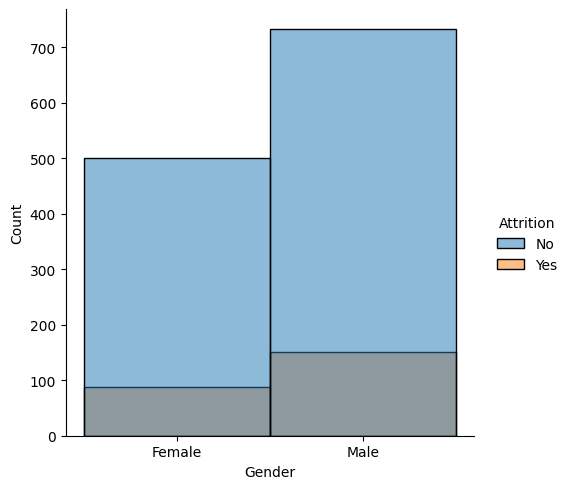

In [20]:
sns.displot(data=data,x="Gender",hue="Attrition")

From the above plot , it is observed that there are no any discrepancies betweeen male and female employee composition.

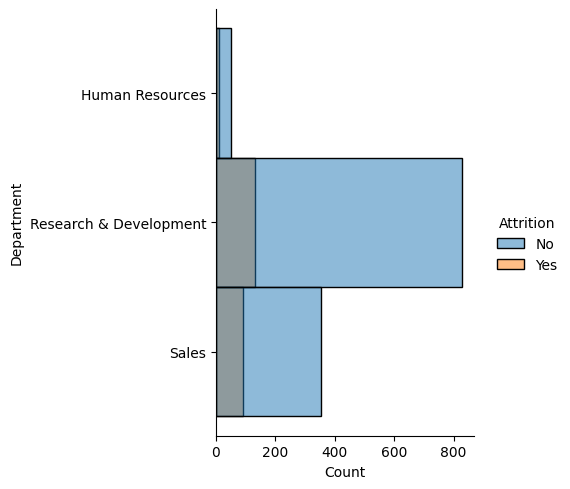

In [21]:
sns.displot(data=data,y="Department",hue="Attrition")

From the three departments the most of the employees are in Research and Development Department and Sales Department while the Human Resource Department has the least employees.

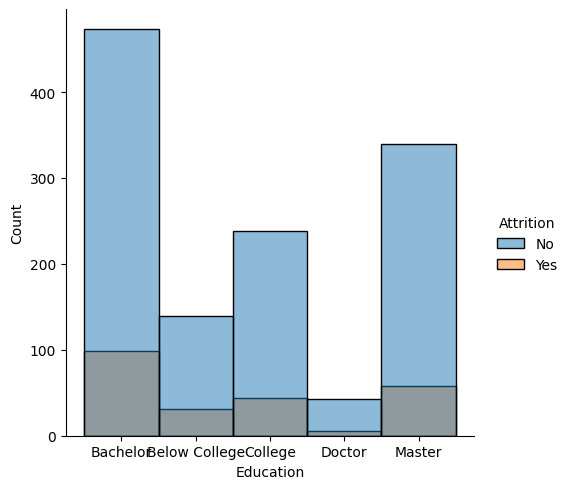

In [22]:
sns.displot(data=data,x="Education",hue="Attrition")

It is observed that most of the employees has a minimum qualification of Bachelor's Degree.

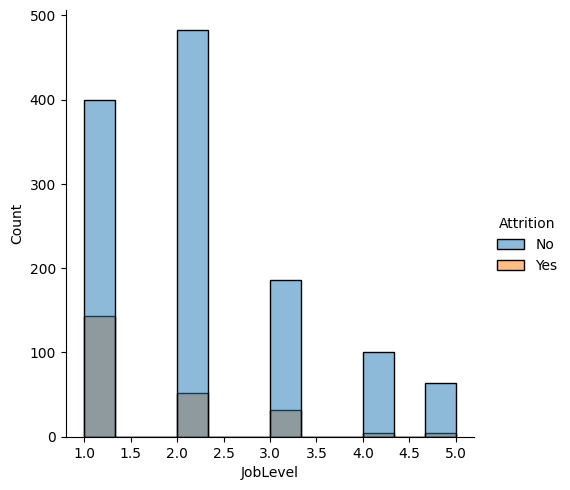

In [23]:
sns.displot(data=data,x="JobLevel",hue="Attrition")

Most of the employees are on Job Level 1 and 2 and the higher attrition is observed in Job Level 1.

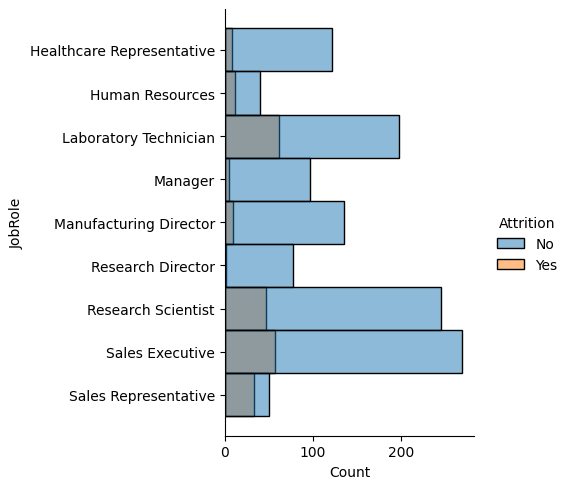

In [24]:
sns.displot(data=data,y="JobRole",hue="Attrition")

Most of the Employees are working as Sales Executive, Research Scientist and Laboratory Technician also higher attrition is observed in these job role as compared to others.

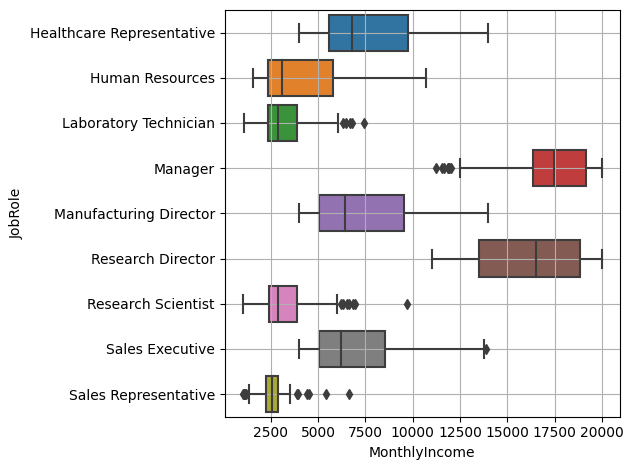

In [25]:
#To see whether Salary plays a important role in attrition
sns.boxplot(x=data["MonthlyIncome"] ,y=data["JobRole"])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

The employees at the post of Manager and Research Directors are having a high salary so there is no attrition among these employees. The Employees at the post of ResearchScientist, Laboratory Technician, Sales Representative, Human Sources have a very low monthly income so they are highly resigning the job.


Text(0, 0.5, 'Count')

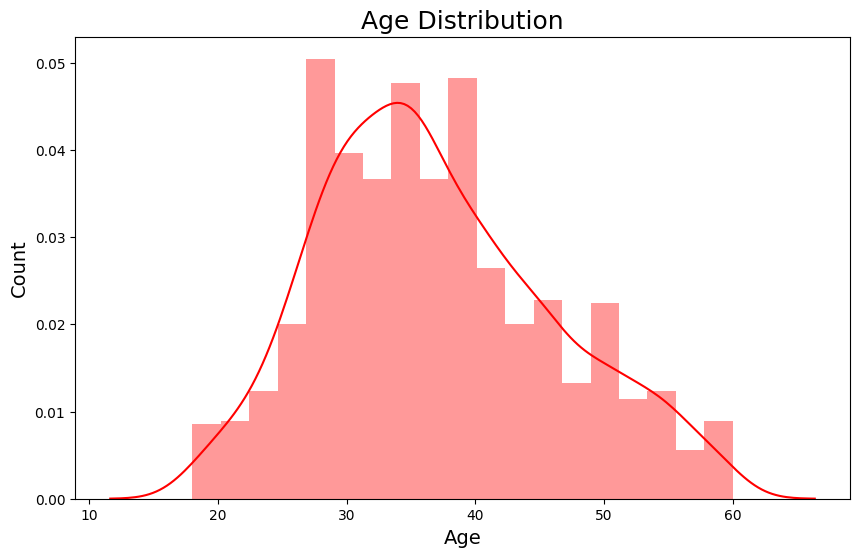

In [29]:
#To get the distribution plot for Age variable
plt.figure(figsize=(10,6))
sns.distplot(data.Age,color='r')
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)

Maximum of the employees belongs to age group 28-42. 

 It is observed that Job Role as mentioned above Manager and Research Director have very less attrition as compared to the other Roles. Higher attrition is observed among Healthcare Representatives, Sales Executive.

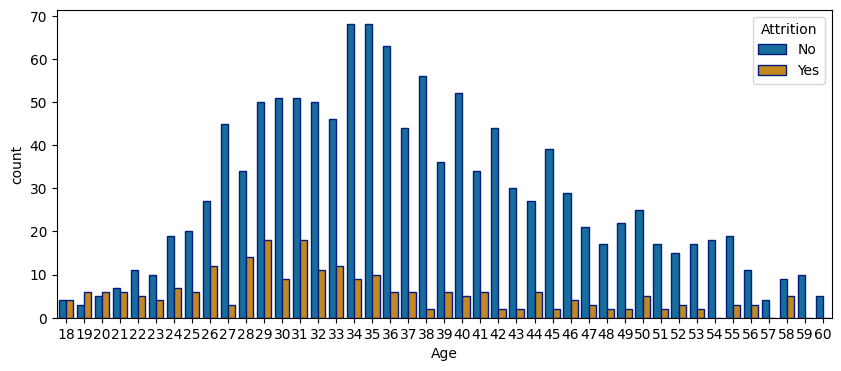

In [26]:
#To show the plot for attrition with respect to age
fig_dim=(10,4)
fig,axis=plt.subplots(figsize=fig_dim)
sns.countplot(x='Age',hue='Attrition',data=data,palette="colorblind",ax=axis,edgecolor=sns.color_palette("dark",n_colors=1));


It is observed that the higher attrition is observed among the age group from 18 to 33 and then the employees from age group greater than 34 has a higher retention .

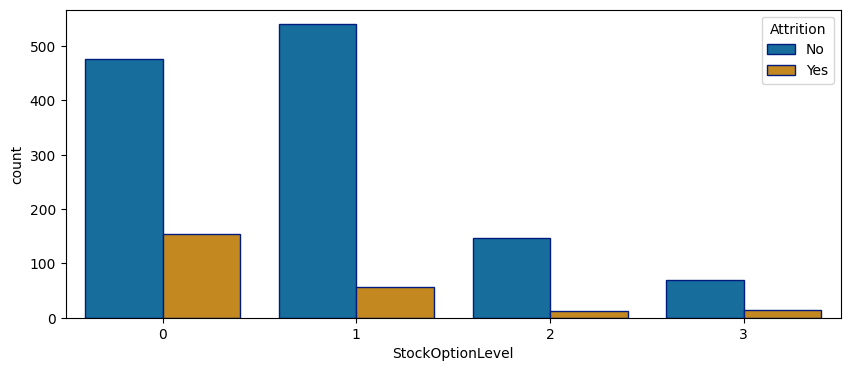

In [27]:
#To show the plot for attrition with respect to age
fig_dim=(10,4)
fig,axis=plt.subplots(figsize=fig_dim)
sns.countplot(x='StockOptionLevel',hue='Attrition',data=data,palette="colorblind",ax=axis,edgecolor=sns.color_palette("dark",n_colors=1));

Employees that have high stock option level is less likely to leave the company as compared to those who do not have or a less stock option level.So, Less level of Stock Option leads to the increase of the attrition rate.

<Axes: >

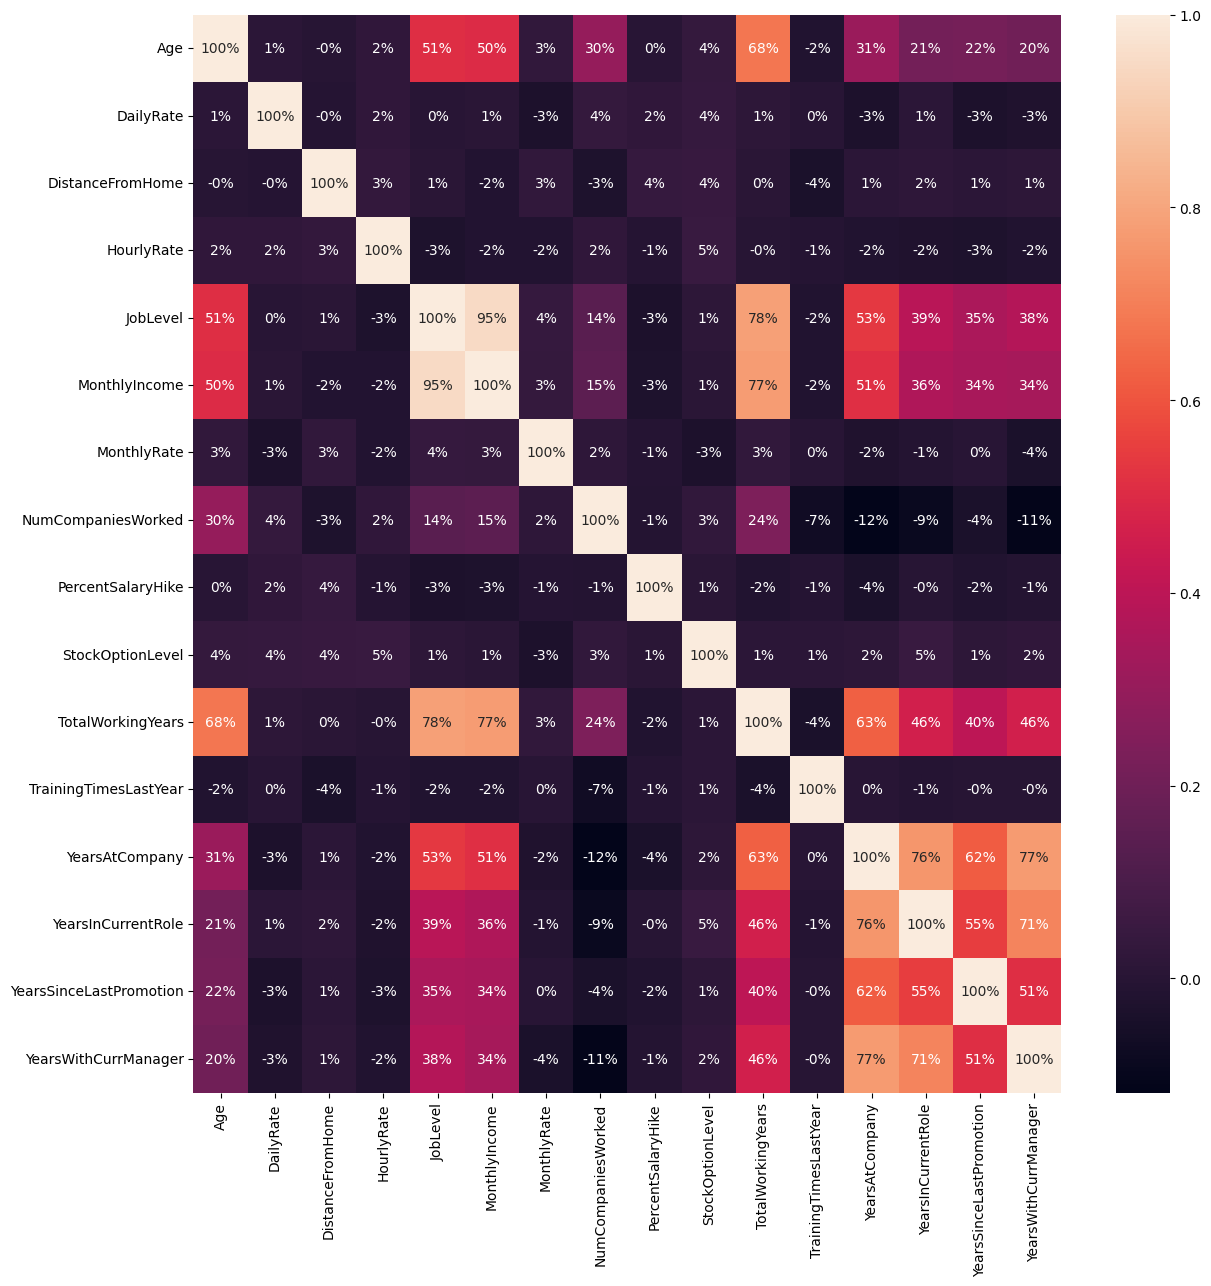

In [28]:
#To explore the correlation between these features
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

It is observed that there is multicollinearity among the variables such as Age and Job Level, Monthly Income, Total working Years also Job Level and Monthly Income are highly correlated with Total Working Years.

In [30]:
#To code the categorical outcome Attrition which is a dependent variable by using Label Encoder.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Attrition']=label_encoder.fit_transform(data["Attrition"])
data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [31]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [32]:
#To code the categorical independent variables using dummy variables
data1=pd.get_dummies(data,drop_first=True)
data1.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1102,1,94,2,5993,19479,8,11,...,0,1,1,0,1,0,0,0,0,0
1,49,0,279,8,61,2,5130,24907,1,23,...,1,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,92,1,2090,2396,6,15,...,0,1,1,0,0,1,0,0,1,0
3,33,0,1392,3,56,1,2909,23159,1,11,...,1,0,1,0,0,0,0,0,1,0
4,27,0,591,2,40,1,3468,16632,9,12,...,1,0,0,0,0,0,1,0,1,0


In [33]:
#Create a column at the end of the dataframe that contains the same value as 'Age'
data1['Age_yrs']=data1['Age']
#Remove the first original column called 'AGE'
data1=data1.drop('Age',axis=1)
data1

,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Age_yrs
0,1,1102,1,94,2,5993,19479,8,11,0,...,1,1,0,1,0,0,0,0,0,41
1,0,279,8,61,2,5130,24907,1,23,1,...,0,0,1,0,0,1,0,1,0,49
2,1,1373,2,92,1,2090,2396,6,15,0,...,1,1,0,0,1,0,0,1,0,37
3,0,1392,3,56,1,2909,23159,1,11,0,...,0,1,0,0,0,0,0,1,0,33
4,0,591,2,40,1,3468,16632,9,12,1,...,0,0,0,0,0,1,0,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,884,23,41,2,2571,12290,4,17,1,...,0,0,0,0,0,0,0,1,0,36
1466,0,613,6,42,3,9991,21457,4,15,1,...,0,0,0,1,0,0,0,1,0,39
1467,0,155,4,87,2,6142,5174,1,20,1,...,0,1,1,0,1,0,0,1,0,27
1468,0,1023,2,63,2,5390,13243,2,14,0,...,0,0,0,0,0,1,0,0,1,49


In [34]:
#Splitting the dataset
x=data1.drop('Attrition',axis=1)
y=data1.Attrition

In [35]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)
print('x train.size:',len(x_train))
print('x test.size:',len(x_test))
print('y train size:',len(y_train))
print('y test size:',len(y_test))

x train.size: 1176
x test.size: 294
y train size: 1176
y test size: 294


The training dataset is of 80% of total and remaining 20% for test set.

In [36]:
#Scaling of the continuous features with high varaiblity among them excluding the ordinal varaibles
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scale_col=['Age_yrs','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
x_train[Scale_col]=Scaler.fit_transform(x_train[Scale_col])
x_test[Scale_col]=Scaler.transform(x_test[Scale_col])

In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

0    982
1    194
Name: Attrition, dtype: int64
0    251
1     43
Name: Attrition, dtype: int64


It is observed that the target variable is highly imbalance, with much No values of Attrition than Yes.

The SMOTE Technique is used which creates synthetically more Yes values so that both class prefer equal distribution during training. I used oversampling of minor class since undersampling of major class may result in loss of relevant data.

In [38]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
#Using SMOTE Technique
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

In [41]:
y_train.value_counts()

0    982
1    982
Name: Attrition, dtype: int64

The technique has created the synthetic samples so that the target variable is completely balanced and we can perform further analysis.

In [55]:
#To fit the models
#Decision Tree Classifier
#Importing required libraries for Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  #Since problem is classification so impoer classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  #Gives the report of performance

In [94]:
#Building Decision Tree Classifier using Entropy Criteria
model1=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=45)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=45)

[Text(0.5, 0.875, 'x[8] <= 0.5\ngini = 0.5\nsamples = 1964\nvalue = [982, 982]'),
 Text(0.25, 0.625, 'x[45] <= 0.5\ngini = 0.452\nsamples = 1089\nvalue = [376, 713]'),
 Text(0.125, 0.375, 'x[25] <= 0.5\ngini = 0.398\nsamples = 904\nvalue = [248, 656]'),
 Text(0.0625, 0.125, 'gini = 0.321\nsamples = 743\nvalue = [149, 594]'),
 Text(0.1875, 0.125, 'gini = 0.474\nsamples = 161\nvalue = [99, 62]'),
 Text(0.375, 0.375, 'x[9] <= 0.122\ngini = 0.426\nsamples = 185\nvalue = [128, 57]'),
 Text(0.3125, 0.125, 'gini = 0.456\nsamples = 57\nvalue = [20, 37]'),
 Text(0.4375, 0.125, 'gini = 0.264\nsamples = 128\nvalue = [108, 20]'),
 Text(0.75, 0.625, 'x[3] <= 1.5\ngini = 0.426\nsamples = 875\nvalue = [606, 269]'),
 Text(0.625, 0.375, 'x[48] <= 0.5\ngini = 0.5\nsamples = 370\nvalue = [184, 186]'),
 Text(0.5625, 0.125, 'gini = 0.453\nsamples = 216\nvalue = [141, 75]'),
 Text(0.6875, 0.125, 'gini = 0.403\nsamples = 154\nvalue = [43, 111]'),
 Text(0.875, 0.375, 'x[17] <= 0.5\ngini = 0.275\nsamples = 505

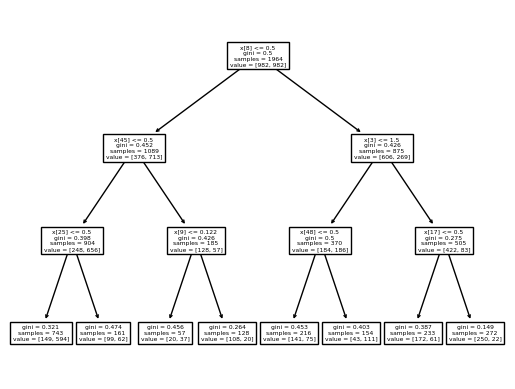

In [50]:
#Plot the Decision Tree
tree.plot_tree(model1)

In [51]:
#Predicting on data
preds=model1.predict(x_test)
pd.Series(preds).value_counts()

0    220
1     74
dtype: int64

In [52]:
y_test.value_counts()

0    251
1     43
Name: Attrition, dtype: int64

In [56]:
confusion_matrix=confusion_matrix(y_test,preds)
print(confusion_matrix)

[[195  56]
 [ 25  18]]


In [57]:
#Classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       251
           1       0.24      0.42      0.31        43

    accuracy                           0.72       294
   macro avg       0.56      0.60      0.57       294
weighted avg       0.79      0.72      0.75       294



The decision tree gives an accuracy of 72%.



In [58]:
#Logistic Regression
#To determine whether the employee leaves the job or not i.e. Attrition which is dependent and binary categorical variable so we perform Logistic Regression
from sklearn.linear_model import LogisticRegression

In [59]:
#To call the classifier and fit the model
model2=LogisticRegression(random_state=109)
model2.fit(x_train,y_train)

LogisticRegression(random_state=109)

In [60]:
#Predict for x dataset
y_pred=model2.predict(x_test)
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':model2.predict(x_test)})
y_pred_df[25:70]

,actual,predicted
943,0,0
577,0,0
786,0,0
1378,0,0
926,0,0
1361,0,0
1092,0,0
1010,0,0
853,0,0
162,0,1


In [61]:
#Correct Prediction
y_pred_df['correct']=y_pred_df['actual']==y_pred_df['predicted']
y_pred_df['correct'].mean()

0.8435374149659864

In [62]:
#Confusion Matrix for model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[227  24]
 [ 22  21]]


In [63]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       251
           1       0.47      0.49      0.48        43

    accuracy                           0.84       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.85      0.84      0.85       294



The classifier gives an accuracy of 84%.

In [64]:
#Model Validation Technique(KFold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed = 57
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = LogisticRegression(max_iter=400)
model.fit(x_train,y_train)
results = cross_val_score(model, x_train, y_train, cv=kfold)
results

array([0.85786802, 0.87309645, 0.91370558, 0.88832487, 0.89795918,
       0.90816327, 0.89285714, 0.87244898, 0.87755102, 0.89795918])

In [65]:
results.mean()

0.8879933699368072

On applying the k-fold cross validation technique to Lofistic Regression classifier the accuracy increases to abput 88.7993%

In [66]:
#Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [100]:
num_trees=150
max_features=8
kfold=KFold(n_splits=20,random_state=8,shuffle=True)
model3=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
model3.fit(x_train,y_train)


RandomForestClassifier(max_features=8, n_estimators=150)

In [68]:
#Predict for x dataset
y_pred=model3.predict(x_test)
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':model3.predict(x_test)})
y_pred_df[25:70]

,actual,predicted
943,0,0
577,0,0
786,0,0
1378,0,0
926,0,0
1361,0,0
1092,0,0
1010,0,0
853,0,1
162,0,0


In [69]:
#Correct Prediction
y_pred_df['correct']=y_pred_df['actual']==y_pred_df['predicted']
y_pred_df['correct'].mean()

0.8707482993197279

In [70]:
#Confusion Matrix for model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[245   6]
 [ 32  11]]


In [71]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       251
           1       0.65      0.26      0.37        43

    accuracy                           0.87       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294



The Random Forest Classifier gives an accuracy of about 87%.

In [72]:
#To see the feature importance by the random forest model

importances=pd.DataFrame({'feature':data1.iloc[:,1:data1.shape[1]].columns,'importance':np.round(model3.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
StockOptionLevel,0.057
TotalWorkingYears,0.050
MonthlyIncome,0.047
JobLevel,0.045
DistanceFromHome,0.045
Age_yrs,0.043
YearsAtCompany,0.043
JobSatisfaction_Very High,0.040
NumCompaniesWorked,0.040


<Axes: xlabel='feature'>

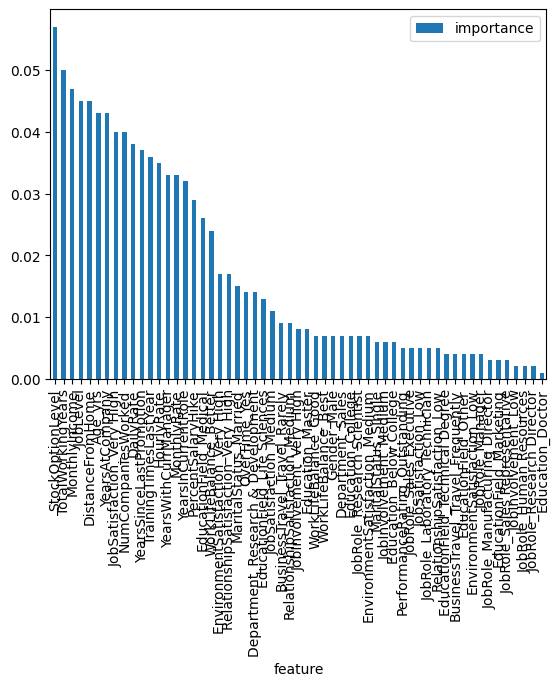

In [73]:
importances.plot.bar()

From the above plot it is observed that Stock Option Level, Total Working Years, Monthly Income, Job Level contributes more for the Attrition Procedure.

In [74]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
#Import SVM Classifier
from sklearn import svm

In [76]:
#Create SVM Classifier
model4=svm.SVC(kernel='rbf',probability=True)

In [77]:
model4.fit(x_train,y_train)

SVC(probability=True)

In [78]:
#Predict the response for test dataset
y_pred=model4.predict(x_test)

In [79]:
#Import metrics for accuracy calculation
#Confusion Matrix for model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[237  14]
 [ 25  18]]


In [80]:
#Import metrics for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8673469387755102


In [81]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       251
           1       0.56      0.42      0.48        43

    accuracy                           0.87       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.85      0.87      0.86       294



The Support Vector Classifier gives an accuracy of about 87%.

In [83]:
#Stacking Technique (Ensemble Technique that combines the classification models and provides the prediction of target variable based on the votes.)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [82]:
kfold=KFold(n_splits=20,random_state=50,shuffle=True)

In [84]:
#To assign different Learners
estimators=[]
model1=LogisticRegression(max_iter=500)
estimators.append(('Logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
estimators

[('Logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [85]:
#Create the Ensemble Model
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)
results.mean()

[0.83783784 0.85135135 0.78378378 0.81081081 0.90540541 0.85135135
 0.85135135 0.89189189 0.85135135 0.86486486 0.79452055 0.80821918
 0.87671233 0.83561644 0.80821918 0.87671233 0.89041096 0.80821918
 0.90410959 0.84931507]


0.8476027397260275

On applying the Stacking Ensemble Technique we get an accuracy of about 84.76%.

In [86]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
#Importing Libraries
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
#Fit model on training data
model5=XGBClassifier(n_estimators=40,max_depth=5,random_state=87)
model5.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=87, ...)

In [121]:
#Make predictions for test data
y_pred=model5.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[241  10]
 [ 29  14]]


In [123]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:%.4f%%"%(accuracy*100.0))

Accuracy:86.7347%


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       251
           1       0.58      0.33      0.42        43

    accuracy                           0.87       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.85      0.87      0.85       294



The accuracy of the XG Boost model is 87%.

Text(0, 0.5, 'True Positive Rate')

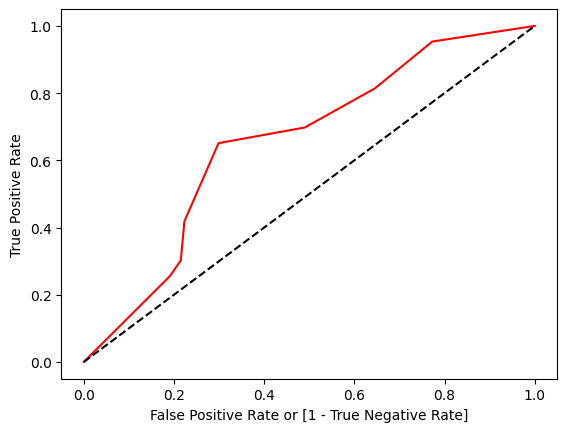

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1]) 

auc = roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [96]:
auc

0.6553784860557769

Text(0, 0.5, 'True Positive Rate')

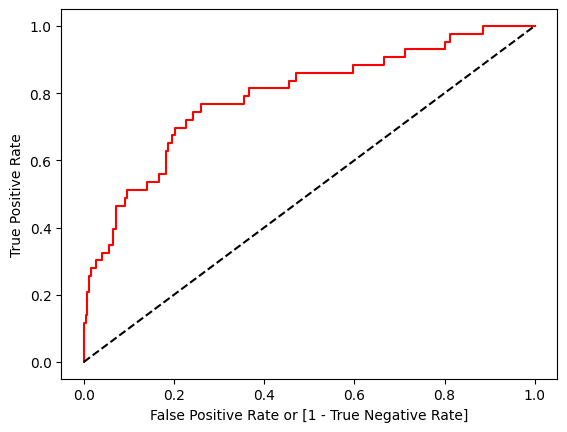

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

auc = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [98]:
auc

0.7904197164829055

Text(0, 0.5, 'True Positive Rate')

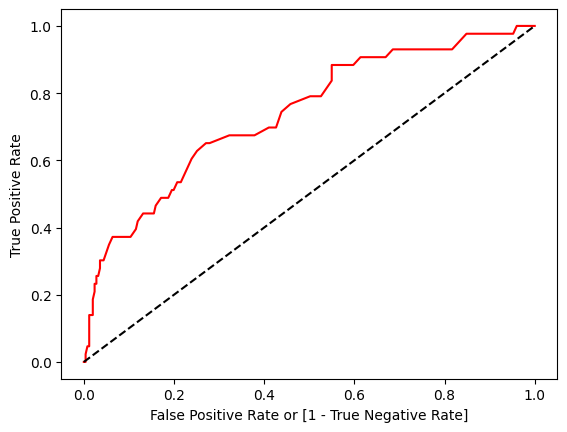

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model3.predict_proba(x_test)[:,1]) 

auc = roc_auc_score(y_test,model3.predict_proba(x_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [102]:
auc

0.7389511720559622

Text(0, 0.5, 'True Positive Rate')

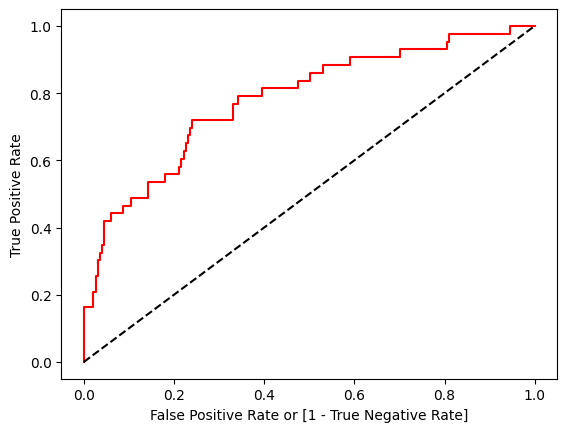

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(x_test)[:,1]) 

auc = roc_auc_score(y_test,model4.predict_proba(x_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [104]:
auc

0.7809691466691374

Text(0, 0.5, 'True Positive Rate')

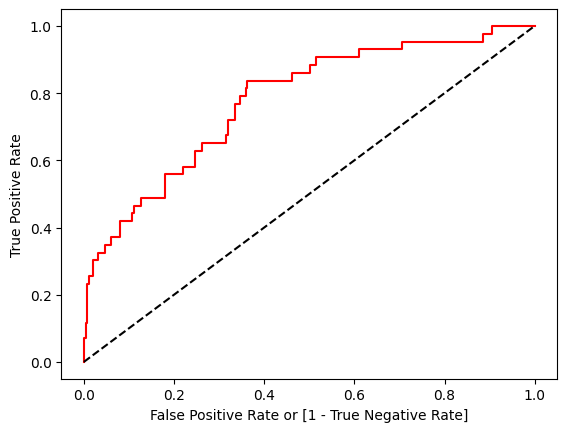

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model5.predict_proba(x_test)[:,1]) 

auc = roc_auc_score(y_test,model5.predict_proba(x_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [126]:
auc

0.7783748726026128

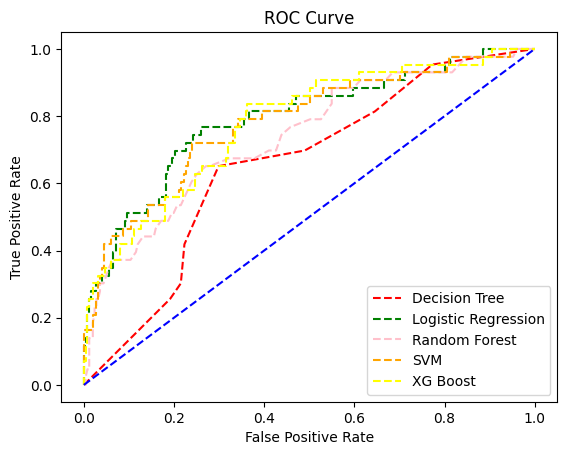

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(x_test)[:,1]) 
fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])  
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(x_test)[:,1]) 
fpr4, tpr4, thresholds4 = roc_curve(y_test, model4.predict_proba(x_test)[:,1]) 
fpr5, tpr5, thresholds4 = roc_curve(y_test, model5.predict_proba(x_test)[:,1]) 


#ROC For TPR=FPR
random_probs=[0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc1 = roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])
auc2 = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
auc3 = roc_auc_score(y_test,model3.predict_proba(x_test)[:,1])
auc4 = roc_auc_score(y_test,model4.predict_proba(x_test)[:,1])
auc5 = roc_auc_score(y_test,model5.predict_proba(x_test)[:,1])

#Plot ROC Curve
plt.plot(fpr1,tpr1,linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr2,tpr2,linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3,tpr3,linestyle='--',color='pink', label='Random Forest')
plt.plot(fpr4,tpr4,linestyle='--',color='orange',label='SVM')
plt.plot(fpr5,tpr5,linestyle='--',color='yellow',label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')

#Totle
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [128]:
auc1


0.6553784860557769

In [129]:
auc2

0.7904197164829055

In [130]:
auc3

0.7389511720559622

In [131]:
auc4

0.7809691466691374

In [132]:
auc5

0.7783748726026128

From the above auc score the model with highest auc is Logistic regression .